The landsat_hires netcdf file can be found at http://glasslab.engr.ccny.cuny.edu/u/hannah/eas213/landsat_hires.nc

If you have the file on your computer, set the path to the location on disk:

```python
datapath = "/path/to/landsat_hires.nc"
```
if you are running the file via mybinder (the interactive version), then set the path to the managed version of the data:

```python
from quilt.data.story645.eas213 import landsat_hires
datapath = landsat_hires._data()
```

You can also install quilt and the data package on your computer to access the data. To do so, enter the following commands in a terminal or anaconda command prompt:

```bash
pip install quilt
quilt install story645/eas213
```


In [1]:
#set datapath variable in this cell
datapath = '../data/landsat_hires.nc'

In [4]:
import xarray as xr
ds = xr.open_dataset(datapath)

In [5]:
import landsat_sample_functions as lf
# pull out the thermal radiances from from ds and convert them to temperature
tempK = lf.BT(ds['Thermal Radiances'], 10.9, 1)
#convert the temperature to Fahrenheit
tempF = 9/5*(tempK - 273) + 32

# How does temperature change over time?

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [7]:
# print the min and max to get rough values for colormap
tempF.min(), tempF.max()

(<xarray.DataArray 'Thermal Radiances' ()>
 array(9.086847807401028), <xarray.DataArray 'Thermal Radiances' ()>
 array(78.4112435427624))

In [8]:
# lets set the parameters
vmin = 10
vmax = 80
cmap = 'RdYlBu_r'

In [9]:
# use the pandas library to clean up the dates
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
# strftime reference: http://strftime.org/
import pandas as pd
datestr = pd.to_datetime(ds.time.values).strftime("%B %d, %Y")
num_frames = len(datestr)
datestr

array([u'April 10, 2014', u'April 26, 2014', u'June 29, 2014',
       u'July 31, 2014', u'August 16, 2014', u'September 01, 2014',
       u'September 17, 2014', u'October 03, 2014', u'November 04, 2014',
       u'January 07, 2015', u'January 23, 2015', u'February 24, 2015',
       u'March 12, 2015', u'April 13, 2015', u'April 29, 2015',
       u'May 31, 2015', u'August 03, 2015', u'August 19, 2015',
       u'October 06, 2015', u'October 22, 2015', u'November 23, 2015'], 
      dtype='<U18')

In [21]:
%%capture 
# %% capture supresses cell output, used here so that only the animation shows
# create figure
fig, ax = plt.subplots()
# plot the first tempF frame, 
# tell imshow the image is upside down
# use vmin, vmax, and cmap to make all images consistent

pcm = ax.imshow(tempF[0], vmin=vmin, vmax= vmax, cmap=cmap, 
            interpolation='none', origin='lower')
#create one colorbar that'll be used for all the images
cb = fig.colorbar(pcm)
#set the colorbar label, the xlabel, and the ylabel
cb.set_label(r"Temperature ($\degree F$)")
ax.set_title(datestr[0])

# animation function.  This is called sequentially
def animate(i):
    # we change the data being drawn
    # and use the tempF at index (time) i
    ax.set_title(datestr[i])
    pcm.set_data(tempF[i].values)
    return [pcm]

In [22]:
ani = animation.FuncAnimation(fig, animate, frames=range(0,num_frames))
HTML(ani.to_jshtml())

In [12]:
ani.save('temperature.html', dpi=80)

# Make a video for NDVI

In [13]:
def NDVI(nir, red):
    return (nir-red)/(nir+red)

In [14]:
ds['ndvi'] = NDVI(ds['NIR'], ds['Red'])

c:\Anaconda2\lib\site-packages\xarray\core\variable.py:1164: RuntimeWarning: invalid value encountered in divide
  if not reflexive


In [17]:
ds['tempF'] = tempF

In [18]:
ds['ndvi']

<xarray.DataArray 'ndvi' (time: 21, y: 815, x: 921)>
array([[[-0.134914, -1.      , ...,  0.270383,  0.259816],
        [-1.      , -1.      , ...,  0.27351 ,  0.326861],
        ..., 
        [ 0.446194,  0.502667, ..., -1.      , -1.      ],
        [ 0.503445,  0.546517, ..., -1.      , -1.      ]],

       [[ 0.080585,  0.044822, ...,  0.413414,  0.313589],
        [-0.03888 , -0.423391, ...,  0.294025,  0.324516],
        ..., 
        [ 0.356968,  0.436533, ..., -1.      , -1.      ],
        [ 0.559047,  0.650762, ..., -1.      , -1.      ]],

       ..., 
       [[ 0.156674,  0.078898, ...,  0.483444,  0.51075 ],
        [-0.120611, -0.726316, ...,  0.257544,  0.465616],
        ..., 
        [ 0.619287,  0.608804, ..., -1.      , -1.      ],
        [ 0.655243,  0.726628, ..., -1.      , -1.      ]],

       [[-1.      ,       nan, ..., -0.265385, -0.013158],
        [      nan,       nan, ...,  0.076561,  0.123596],
        ..., 
        [ 0.656397,  0.624885, ...,       nan,

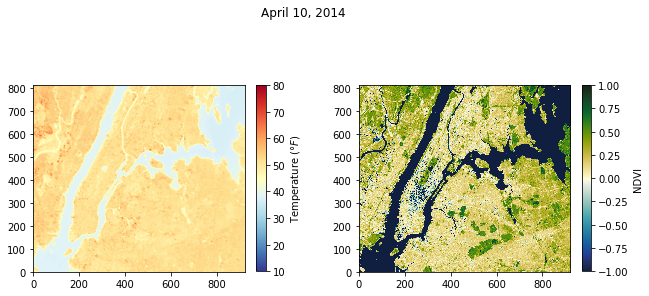

In [50]:
%matplotlib inline
import cmocean.cm as cmo
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

pcm = ax1.imshow(ds['tempF'][0], vmin=vmin, vmax= vmax, 
                 cmap=cmap, interpolation='none', 
                 origin='lower')

ncm = ax2.imshow(ds['ndvi'][0], vmin=-1, vmax=1, 
                 cmap=cmo.delta, interpolation='none', 
                 origin='lower')

cb1 = fig.colorbar(pcm, ax=ax1, fraction=.04)
cb1.set_label(r"Temperature ($\degree F$)")
cb2 = fig.colorbar(ncm, ax=ax2, fraction=.04)
cb2.set_label("NDVI")
fig.suptitle(datestr[0])
fig.subplots_adjust(wspace=.4)

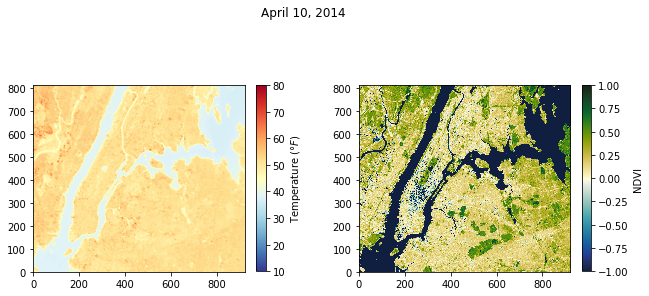

In [50]:
%matplotlib inline
import cmocean.cm as cmo
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

pcm = ax1.imshow(ds['tempF'][0], vmin=vmin, vmax= vmax, 
                 cmap=cmap, interpolation='none', 
                 origin='lower')

ncm = ax2.imshow(ds['ndvi'][0], vmin=-1, vmax=1, 
                 cmap=cmo.delta, interpolation='none', 
                 origin='lower')

cb1 = fig.colorbar(pcm, ax=ax1, fraction=.04)
cb1.set_label(r"Temperature ($\degree F$)")
cb2 = fig.colorbar(ncm, ax=ax2, fraction=.04)
cb2.set_label("NDVI")
fig.suptitle(datestr[0])
fig.subplots_adjust(wspace=.4)

def animate(i):
    fig.suptitle(datestr[i])
    pcm.set_data(ds['tempF'][i].values)
    ncm.set_data(ds[''])
    return [pcm]